In [1]:
import scanpy as sc
import pandas as pd

In [2]:
adata_merged = sc.read_h5ad('./adata_merged.250505-canonical.h5ad')

In [3]:
adata_merged

AnnData object with n_obs × n_vars = 123822 × 17960
    obs: 'pool', 'sample', 'background', 'treatment', 'ectoderm', 'mTeSR', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'batch', 'S_score', 'G2M_score', 'phase', 'ann', 'is_hPSC', '_scvi_batch', '_scvi_labels', 'leiden0.3', 'leiden0.5', 'leiden0.7', 'JUN', 'JUNB', 'JUND', 'FOS', 'FOSB', 'FOSL2', 'HSP90AA1', 'HSP90AB1', 'HSPA1A', 'HSPA1B', 'HSPA5', 'HSPA8', 'HSPB1', 'MT-ND1', 'MT-ND2', 'MT-CO2', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB', 'SRY', 'KDM5D', 'DDX3Y', 'UTY', 'ZFY', 'KDM6A', 'MCM5', 'PCNA', 'TYMS', 'FEN1', 'MCM2', 'MCM4', 'RRM1', 'UNG', 'GINS2', 'MCM6', 'CDCA7', 'DTL', 'PRIM1', 'UHRF1', 'HELLS', 

In [4]:
for s in adata_merged.obs['sample'].unique():
    print(s)

Ctrl-E.p1
Ctrl-ET.p1
Ctrl-hPSC.p1
Ctrl-0.5E
Ctrl-0.5ET
Ctrl-E.p6
Ctrl-ET.p6
H1-0.5E
H1-0.5ET
H1-E
H1-ET
H1-hPSC.p6
JARID2-E
JARID2-ET
JARID2-hPSC
H1-0.5E4T
H1-E4T.1
H1-E4T.2
H1-E4T.3
JARID2-E4T
SMARCC1-E4T
BRM014-E4T
BRM014-E
SMARCC1-E
SMARCC1-ET
H1-hPSC.p8
SMARCC1-hPSC


In [5]:
sample_sel = adata_merged.obs['sample'].isin( ['H1-hPSC.p6', 'H1-0.5E', 'H1-0.5ET', 'H1-0.5E4T', 'H1-E', 'H1-ET', 'H1-E4T.1'] )

adata1 = adata_merged[ sample_sel ].copy()



In [6]:
sample_sel = adata_merged.obs['sample'].isin( ['Ctrl-hPSC.p1', 'Ctrl-E.p6', 'Ctrl-ET.p1', 'H1-E4T.3', 'JARID2-hPSC', 'JARID2-E', 'JARID2-ET', 'JARID2-E4T'] )

adata2 = adata_merged[ sample_sel ].copy()



# Figure 1 visualization

In [22]:
H1_color_lut = {
    'H1-hPSC.p6' : '#f6c445',
    'H1-0.5E'  : '#47aa43',
 
    'H1-0.5ET' : '#72a699',
    'H1-0.5E4T'  : '#65dcee',
    
    'H1-E': '#36753b',
    'H1-ET' : '#3c69c3',
    'H1-E4T.1'  : '#2e247e', 
}

order1=['H1-hPSC.p6', 'H1-0.5E', 'H1-0.5ET', 'H1-0.5E4T', 'H1-E', 'H1-ET', 'H1-E4T.1']

adata1.uns['sample_colors'] = [H1_color_lut[cat] for cat in adata1.obs['sample'].cat.categories]

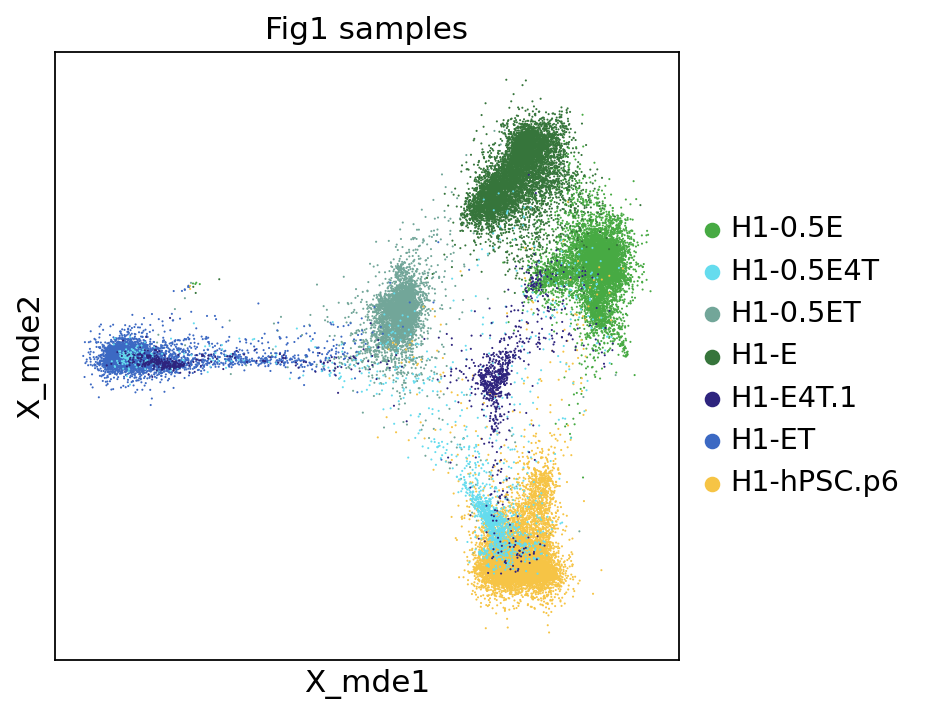

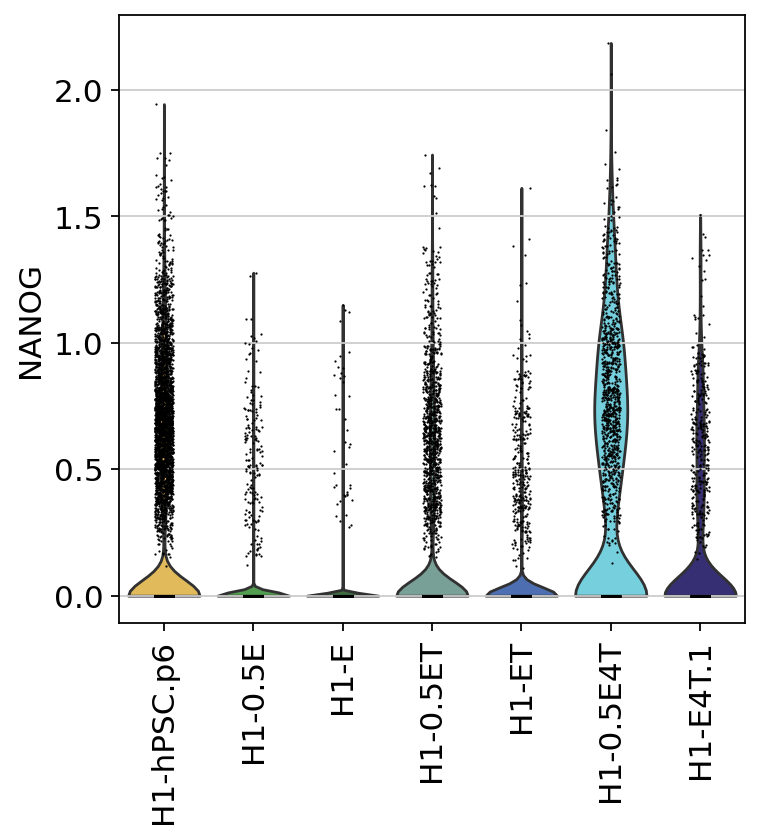

In [23]:
sc.set_figure_params(figsize=[5,5])

sc.pl.embedding(adata1, basis='X_mde', color='sample', title='Fig1 samples') 
sc.pl.violin(adata1, groupby='sample', keys='NANOG', order=['H1-hPSC.p6', 'H1-0.5E', 'H1-E', 'H1-0.5ET', 'H1-ET', 'H1-0.5E4T', 'H1-E4T.1'], rotation=90)

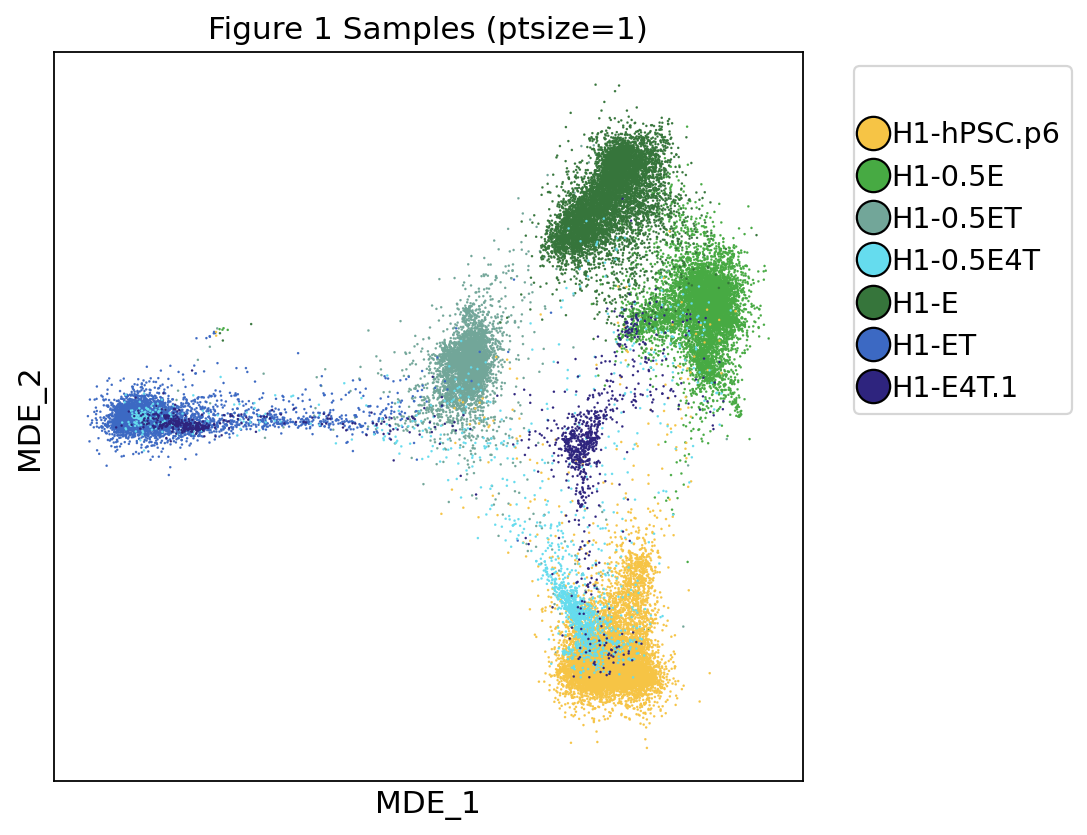

In [29]:
import seaborn as sns, matplotlib.pyplot as plt
data1 = pd.DataFrame(adata1.obsm['X_mde'], columns=['MDE_1','MDE_2'])
data1['Sample'] = adata1.obs['sample'].astype(str).tolist()

plt.figure(figsize=(6, 6))
scatter = sns.scatterplot(data=data1, x='MDE_1', y='MDE_2', hue='Sample', s=1, alpha=1, edgecolor=None,
                hue_order=order1,
                palette=H1_color_lut)

# 手动创建 legend 句柄，alpha=1
from matplotlib.lines import Line2D
new_handles = [Line2D([0], [0], marker='o', color='w',
                      markerfacecolor=H1_color_lut[label],
                      markeredgecolor='black',
                      markersize=15, alpha=1.0)
               for label in order1]

plt.legend(handles=new_handles, labels=order1,
           title=' ', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks([]);plt.yticks([]);plt.grid(False);
plt.title('Figure 1 Samples (ptsize=1)')
plt.savefig("Figure1.Samples.MDEmap.pdf", dpi=300, bbox_inches='tight')
plt.show()

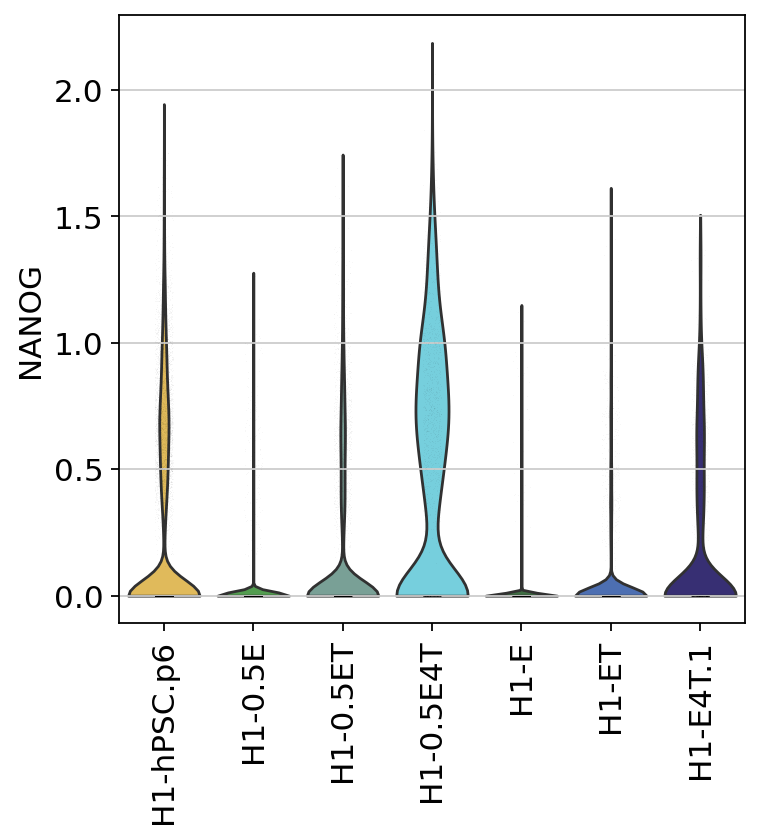

In [34]:
sc.settings.figdir = '.'
sc.pl.violin(adata1, groupby='sample', keys='NANOG', order=order1, rotation=90, size=0.07,density_norm='count',save='Figure1.NANOG.violin.pdf')



/tmp/ipykernel_56070/313472436.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.82, 1])


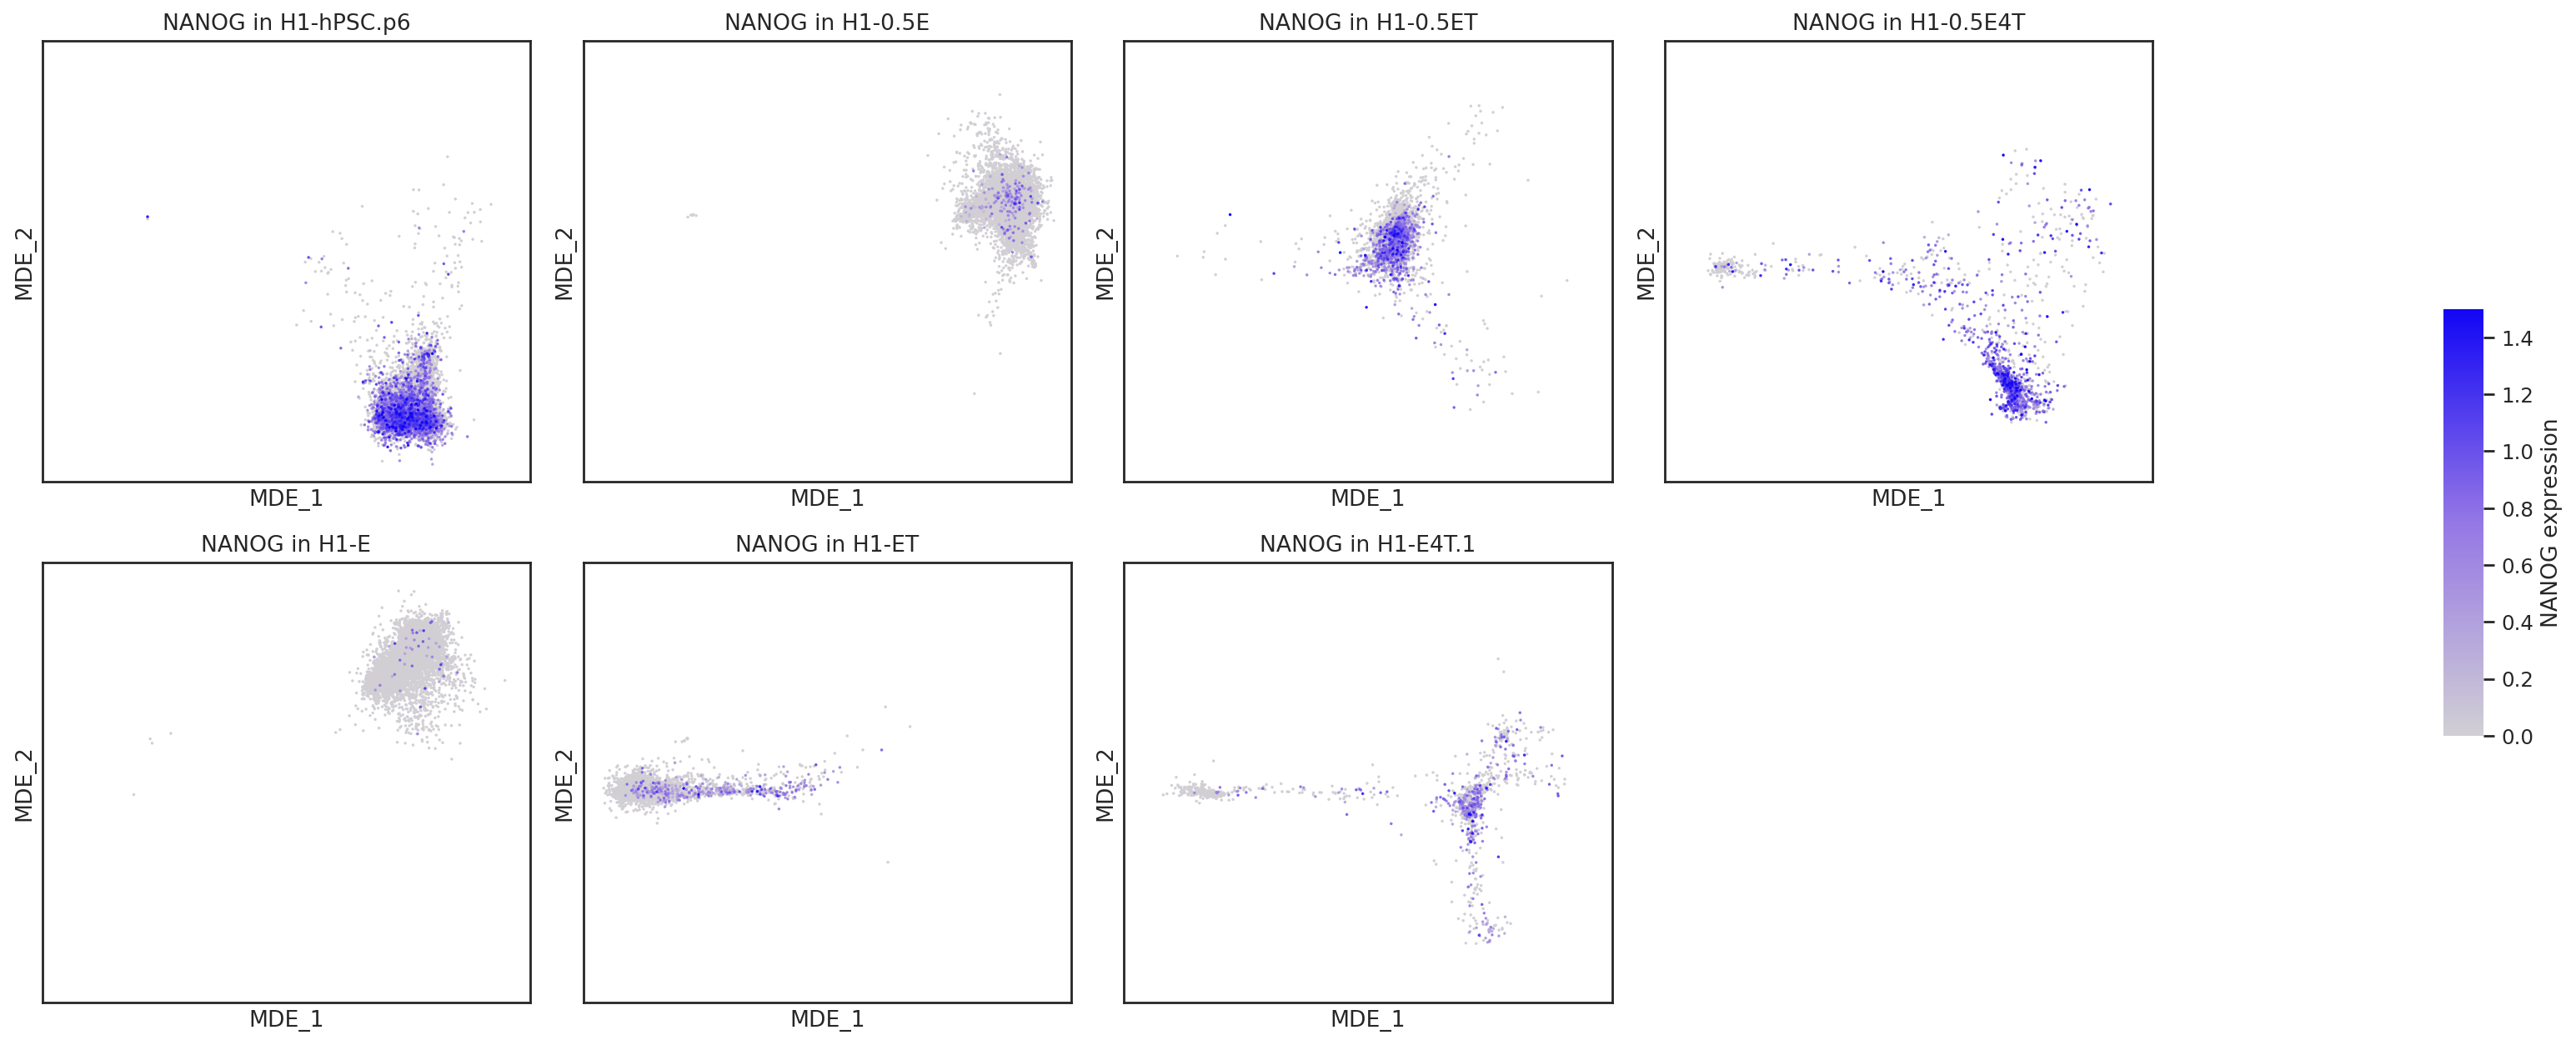

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.colors as mcolors

# 设置参数
gene = 'NANOG'
sample_list = ['H1-hPSC.p6', 'H1-0.5E', 'H1-0.5ET', 'H1-0.5E4T', 'H1-E', 'H1-ET', 'H1-E4T.1']
ncols = 4
nrows = (len(sample_list) + ncols - 1) // ncols

# 颜色参数
vmin, vmax = 0, 1.5
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)


import seaborn as sns, matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm, pandas as pd
mycmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ["#d1cfd4", "#9577e5", "#1206f5"])


fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 4*nrows))
axes = axes.flatten()

sns.set_theme(style="white")

for i, sample_name in enumerate(sample_list):
    adata_sub = adata1[adata1.obs['sample'] == sample_name].copy()
    data1 = pd.DataFrame(adata_sub.obsm['X_mde'], columns=['MDE_1','MDE_2'])
    data1[gene] = adata_sub[:, gene].X.toarray().flatten()
    data1 = data1.sort_values(gene).copy()

    ax = axes[i]
    scatter = sns.scatterplot(
        data=data1,
        x='MDE_1', y='MDE_2',
        hue=gene,
        palette=mycmap,
        s=2, alpha=1.00,
        edgecolor=None,
        hue_norm=(vmin, vmax),
        legend=False,
        ax=ax
    )
    
    mappable = scatter.collections[0]
    mappable.set_cmap(mycmap)
    mappable.set_norm(norm)

    ax.set_title(f"{gene} in {sample_name}")
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_xlim([-1.8, 1.0]); ax.set_ylim([-1.3, 1.2])

# 单独添加一个 colorbar
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.3, 0.015, 0.4])  # [left, bottom, width, height]
cbar = fig.colorbar(mappable, cax=cbar_ax)
cbar.outline.set_visible(False)
cbar.set_label(f"{gene} expression")

# 删除多余子图
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 0.82, 1])
plt.savefig("Figure1.NANOG.MDEmap.pdf", dpi=300, bbox_inches='tight')
plt.show()


In [15]:
import seaborn as sns, matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm, pandas as pd
mycmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ["#d1cfd4", "#9577e5", "#1206f5"])

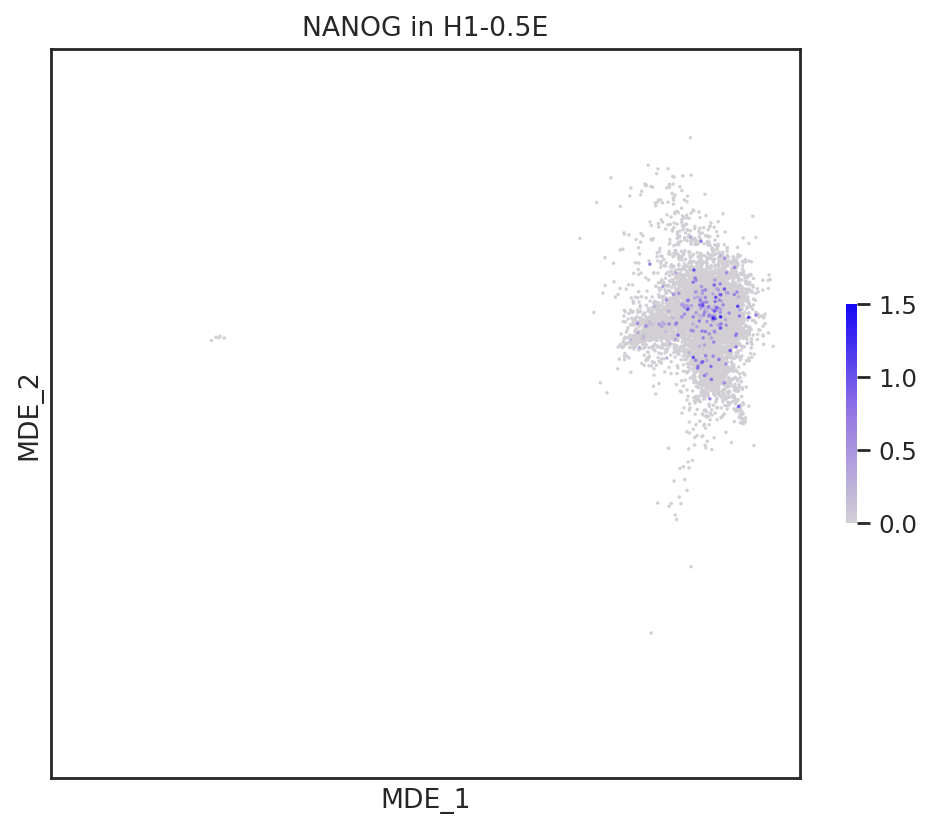

In [228]:
gene = 'NANOG'
sample_name= 'H1-0.5E'
adata_sub = adata1[adata1.obs['sample'] == sample_name].copy()

data1 = pd.DataFrame(adata_sub.obsm['X_mde'], columns=['MDE_1','MDE_2'])
data1[gene] = adata_sub[:, gene].X.toarray().flatten()
data1= data1.sort_values(gene).copy()

plt.figure(figsize=(7.5, 6))
vmin,vmax = 0, 1.5
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
sns.set_theme(style="white")
scatter = sns.scatterplot(data=data1,  x='MDE_1', y='MDE_2', hue=gene, palette=mycmap,
                          s=2, alpha=1.00, edgecolor=None, hue_norm=(vmin, vmax), legend=False)

# 手动添加 colorbar
mappable = scatter.collections[0]
mappable.set_cmap(mycmap)
mappable.set_norm(norm)
cbar = plt.colorbar(mappable, shrink=0.3)
cbar.outline.set_visible(False)
#cbar.set_label(f"{gene} expression")

plt.xticks([]); plt.yticks([])
plt.title(gene+' in '+ sample_name)
plt.xlim([-1.8, 1.0]); plt.ylim([-1.3, 1.2])
plt.show()

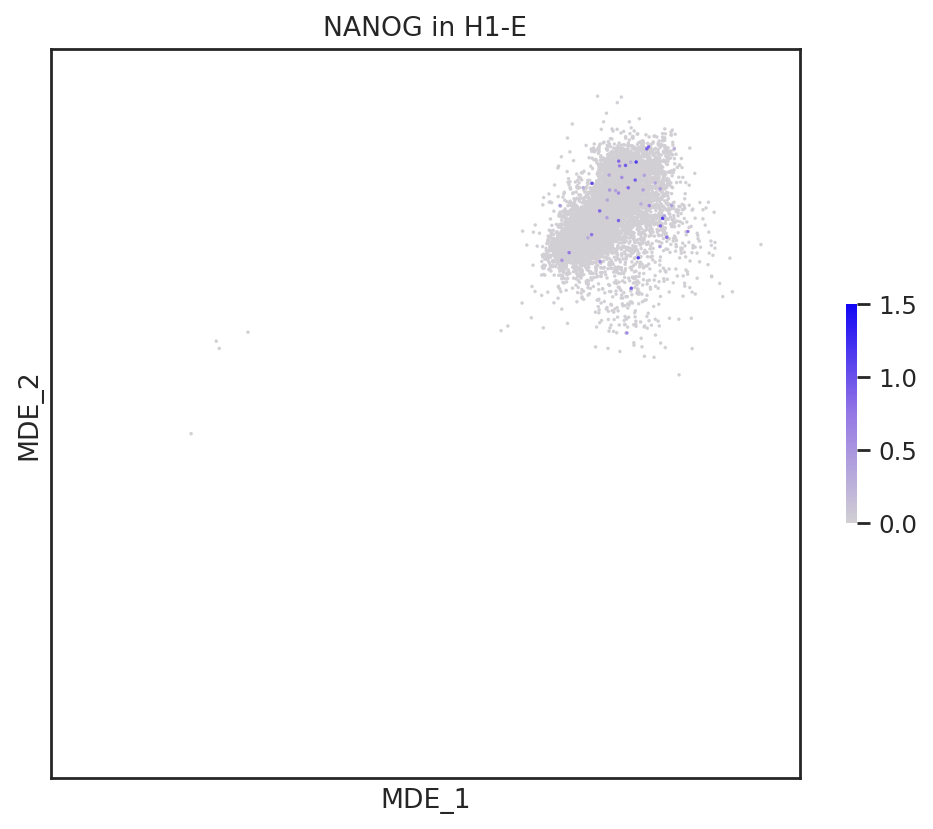

In [229]:
gene = 'NANOG'
sample_name= 'H1-E'
adata_sub = adata1[adata1.obs['sample'] == sample_name].copy()

data1 = pd.DataFrame(adata_sub.obsm['X_mde'], columns=['MDE_1','MDE_2'])
data1[gene] = adata_sub[:, gene].X.toarray().flatten()
data1= data1.sort_values(gene).copy()

plt.figure(figsize=(7.5, 6))
vmin,vmax = 0, 1.5
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
sns.set_theme(style="white")
scatter = sns.scatterplot(data=data1,  x='MDE_1', y='MDE_2', hue=gene, palette=mycmap,
                          s=2, alpha=1.00, edgecolor=None, hue_norm=(vmin, vmax), legend=False)

# 手动添加 colorbar
mappable = scatter.collections[0]
mappable.set_cmap(mycmap)
mappable.set_norm(norm)
cbar = plt.colorbar(mappable, shrink=0.3)
cbar.outline.set_visible(False)
#cbar.set_label(f"{gene} expression")

plt.xticks([]); plt.yticks([])
plt.title(gene+' in '+ sample_name)
plt.xlim([-1.8, 1.0]); plt.ylim([-1.3, 1.2])
plt.show()

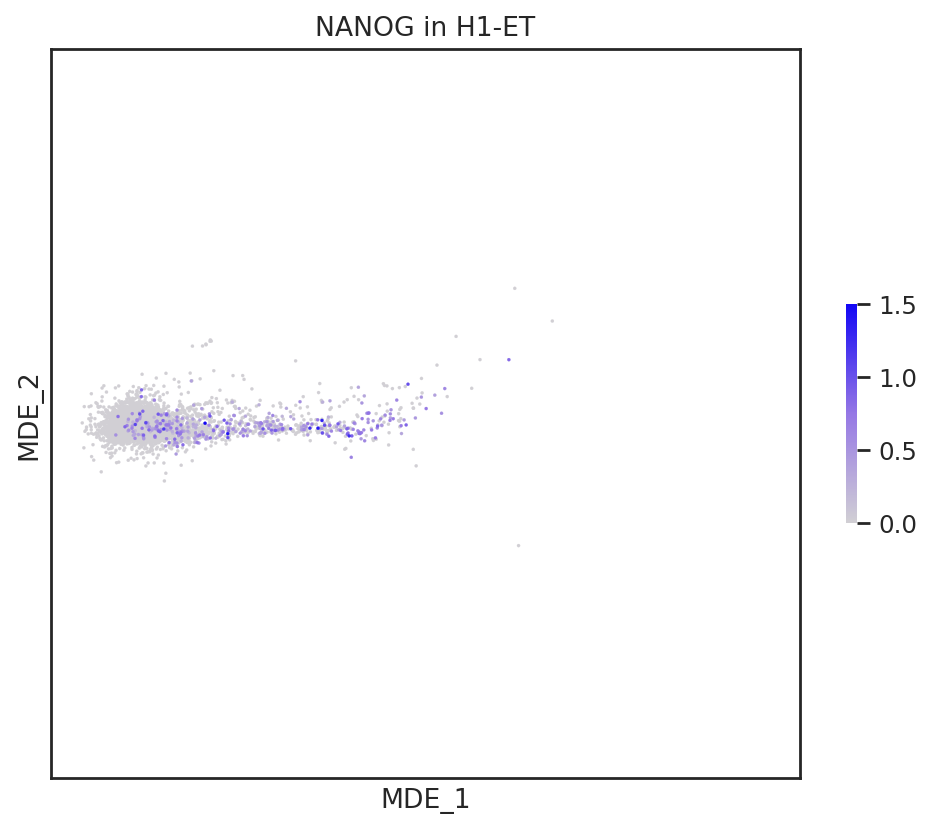

In [230]:
gene = 'NANOG'
sample_name= 'H1-ET'
adata_sub = adata1[adata1.obs['sample'] == sample_name].copy()

data1 = pd.DataFrame(adata_sub.obsm['X_mde'], columns=['MDE_1','MDE_2'])
data1[gene] = adata_sub[:, gene].X.toarray().flatten()
data1= data1.sort_values(gene).copy()

plt.figure(figsize=(7.5, 6))
vmin,vmax = 0, 1.5
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
sns.set_theme(style="white")
scatter = sns.scatterplot(data=data1,  x='MDE_1', y='MDE_2', hue=gene, palette=mycmap,
                          s=2, alpha=1.00, edgecolor=None, hue_norm=(vmin, vmax), legend=False)

# 手动添加 colorbar
mappable = scatter.collections[0]
mappable.set_cmap(mycmap)
mappable.set_norm(norm)
cbar = plt.colorbar(mappable, shrink=0.3)
cbar.outline.set_visible(False)
#cbar.set_label(f"{gene} expression")

plt.xticks([]); plt.yticks([])
plt.title(gene+' in '+ sample_name)
plt.xlim([-1.8, 1.0]); plt.ylim([-1.3, 1.2])
plt.show()

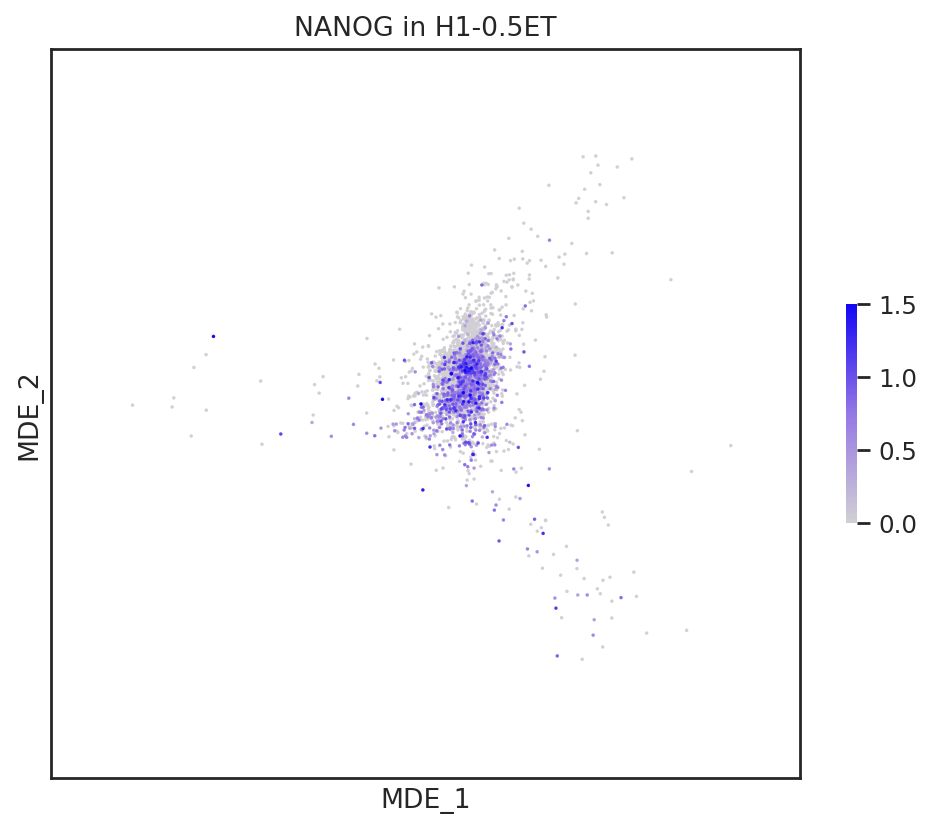

In [231]:
gene = 'NANOG'
sample_name= 'H1-0.5ET'
adata_sub = adata1[adata1.obs['sample'] == sample_name].copy()

data1 = pd.DataFrame(adata_sub.obsm['X_mde'], columns=['MDE_1','MDE_2'])
data1[gene] = adata_sub[:, gene].X.toarray().flatten()
data1= data1.sort_values(gene).copy()

plt.figure(figsize=(7.5, 6))
vmin,vmax = 0, 1.5
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
sns.set_theme(style="white")
scatter = sns.scatterplot(data=data1,  x='MDE_1', y='MDE_2', hue=gene, palette=mycmap,
                          s=2, alpha=1.00, edgecolor=None, hue_norm=(vmin, vmax), legend=False)

# 手动添加 colorbar
mappable = scatter.collections[0]
mappable.set_cmap(mycmap)
mappable.set_norm(norm)
cbar = plt.colorbar(mappable, shrink=0.3)
cbar.outline.set_visible(False)
#cbar.set_label(f"{gene} expression")

plt.xticks([]); plt.yticks([])
plt.title(gene+' in '+ sample_name)
plt.xlim([-1.8, 1.0]); plt.ylim([-1.3, 1.2])
plt.show()

In [ ]:
gene = 'NANOG'
sample_name= 'H1-hPSC.p6'
adata_sub = adata1[adata1.obs['sample'] == sample_name].copy()

data1 = pd.DataFrame(adata_sub.obsm['X_mde'], columns=['MDE_1','MDE_2'])
data1[gene] = adata_sub[:, gene].X.toarray().flatten()
data1= data1.sort_values(gene).copy()

plt.figure(figsize=(7.5, 6))
vmin,vmax = 0, 1.5
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
sns.set_theme(style="white")
scatter = sns.scatterplot(data=data1,  x='MDE_1', y='MDE_2', hue=gene, palette=mycmap,
                          s=2, alpha=1.00, edgecolor=None, hue_norm=(vmin, vmax), legend=False)

# 手动添加 colorbar
mappable = scatter.collections[0]
mappable.set_cmap(mycmap)
mappable.set_norm(norm)
cbar = plt.colorbar(mappable, shrink=0.3)
cbar.outline.set_visible(False)
#cbar.set_label(f"{gene} expression")

plt.xticks([]); plt.yticks([])
plt.title(gene+' in '+ sample_name)
plt.xlim([-1.8, 1.0]); plt.ylim([-1.3, 1.2])
plt.show()

# Figure 2 visualization

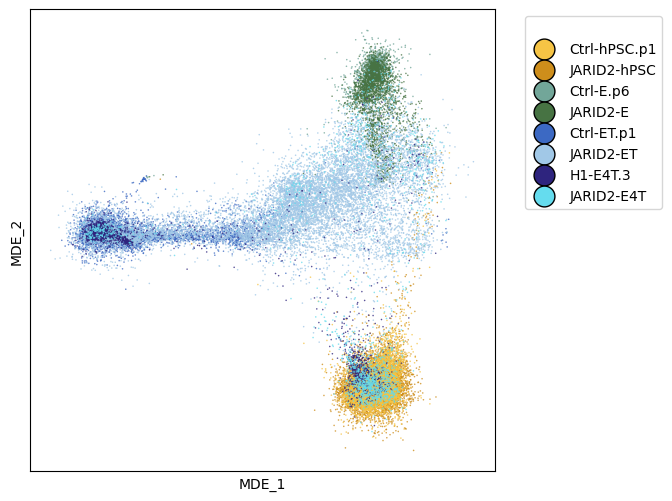

In [7]:
color_lut = { 
    'Ctrl-hPSC.p1' : '#f6c445',
    'JARID2-hPSC'  : '#CE8E1B',
 
    'Ctrl-E.p6' : '#72a699',
    'JARID2-E'  : '#477343' ,
    
    'Ctrl-ET.p1': "#3c69c3",
    'JARID2-ET' : '#a1c8e7',
    
    'H1-E4T.3'  : '#2e247e', 
    'JARID2-E4T': '#65dcee' 
}


import seaborn as sns, matplotlib.pyplot as plt

custom_palette = color_lut


data = pd.DataFrame(adata2.obsm['X_mde'], columns=['MDE_1','MDE_2'])


data['Sample'] = adata2.obs['sample'].astype(str).tolist()
custom_order = ['JARID2-hPSC', 'Ctrl-hPSC.p1', 'Ctrl-E.p6' ,'JARID2-E'  ,'Ctrl-ET.p1','JARID2-ET' ,  'H1-E4T.3'  ,'JARID2-E4T']
order_map = {key: i for i, key in enumerate(custom_order)}
data = data.sort_values(by='Sample', key=lambda x: x.map(order_map))


plt.figure(figsize=(6, 6))
scatter = sns.scatterplot(data=data, x='MDE_1', y='MDE_2', hue='Sample', s=1, alpha=0.8, edgecolor=None,
                #hue_order=['JARID2-hPSC','Ctrl-hPSC.p1' ,'Ctrl-E.p6' ,'JARID2-E'  ,'Ctrl-ET.p1','JARID2-ET' ,  'H1-E4T.3'  ,'JARID2-E4T'],
                palette=color_lut
               )


# 手动创建 legend 句柄，alpha=1
from matplotlib.lines import Line2D
order= ['Ctrl-hPSC.p1' ,'JARID2-hPSC'  ,'Ctrl-E.p6' ,'JARID2-E'  ,'Ctrl-ET.p1','JARID2-ET' ,  'H1-E4T.3'  ,'JARID2-E4T']
new_handles = [Line2D([0], [0], marker='o', color='w',
                      markerfacecolor=custom_palette[label],
                      markeredgecolor='black',
                      markersize=15, alpha=1.0)
               for label in order]

plt.legend(handles=new_handles, labels=order,
           title=' ', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks([]);plt.yticks([]);plt.grid(False);
plt.title('Figure 2 Samples (ptsize=1)')
plt.savefig("Figure2.Samples.MDEmap.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [9]:

#order1=['H1-hPSC.p6', 'H1-0.5E', 'H1-0.5ET', 'H1-0.5E4T', 'H1-E', 'H1-ET', 'H1-E4T.1']

adata2.uns['sample_colors'] = [color_lut[cat] for cat in adata2.obs['sample'].cat.categories]

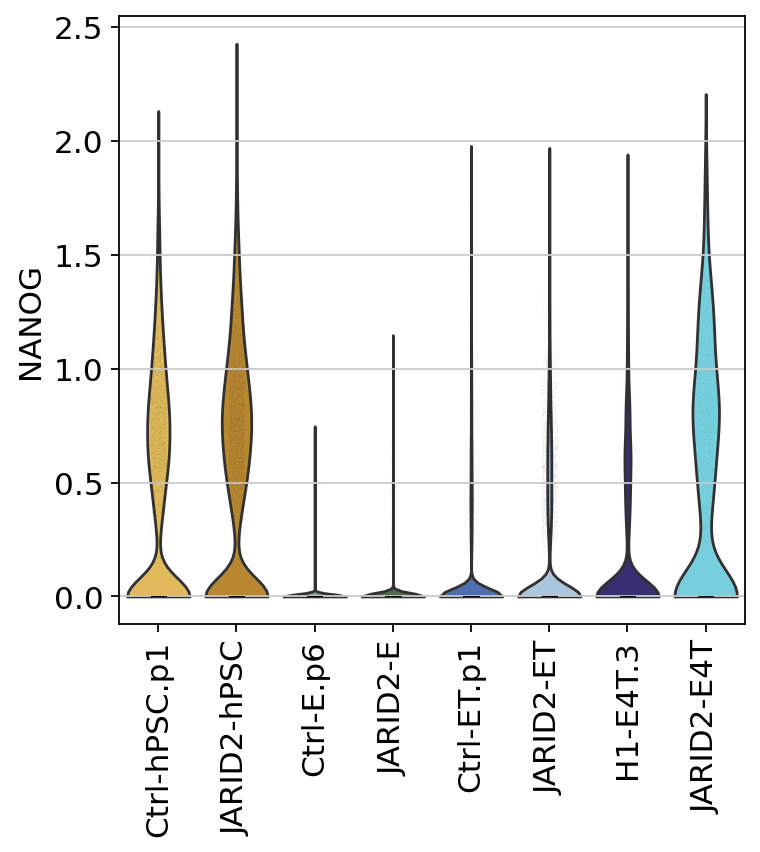

In [13]:
sc.settings.figdir = '.'
sc.pl.violin(adata2, groupby='sample', keys='NANOG', order=order, rotation=90, size=0.07,density_norm='count',save='Figure2.NANOG.violin.pdf')


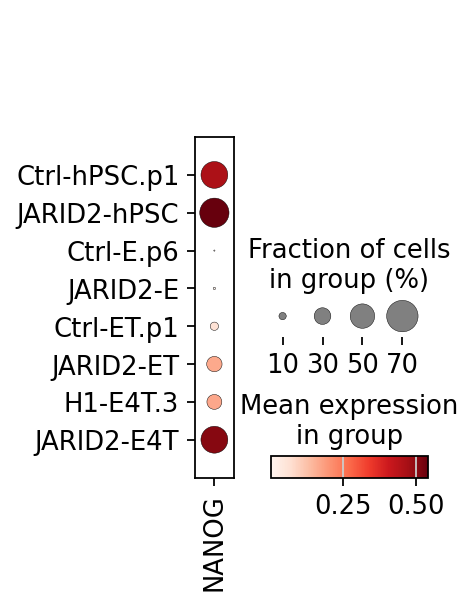

In [121]:
sc.pl.dotplot(adata2, groupby='sample', var_names=['NANOG'],categories_order=order )

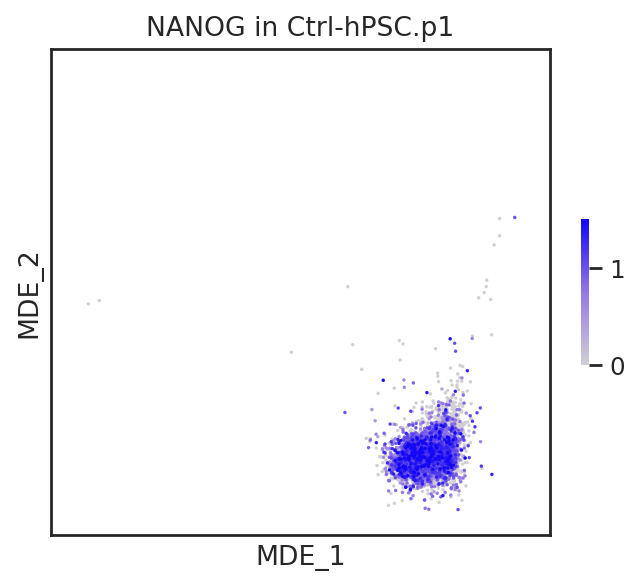

In [22]:
gene = 'NANOG'
sample_name=
adata_sub = adata2[adata2.obs['sample'] == sample_name].copy()

data1 = pd.DataFrame(adata_sub.obsm['X_mde'], columns=['MDE_1','MDE_2'])
data1[gene] = adata_sub[:, gene].X.toarray().flatten()
data1= data1.sort_values(gene).copy()

plt.figure(figsize=(5, 4))
vmin,vmax = 0, 1.5
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
sns.set_theme(style="white")
scatter = sns.scatterplot(data=data1,  x='MDE_1', y='MDE_2', hue=gene, palette=mycmap,
                          s=2, alpha=1.00, edgecolor=None, hue_norm=(vmin, vmax), legend=False)

# 手动添加 colorbar
mappable = scatter.collections[0]
mappable.set_cmap(mycmap)
mappable.set_norm(norm)
cbar = plt.colorbar(mappable, shrink=0.3)
cbar.outline.set_visible(False)
#cbar.set_label(f"{gene} expression")

plt.xticks([]); plt.yticks([])
plt.title(gene+' in '+ sample_name)
plt.xlim([-1.8, 1.0]); plt.ylim([-1.3, 1.2])
plt.show()

/tmp/ipykernel_52581/1041101170.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.82, 1])


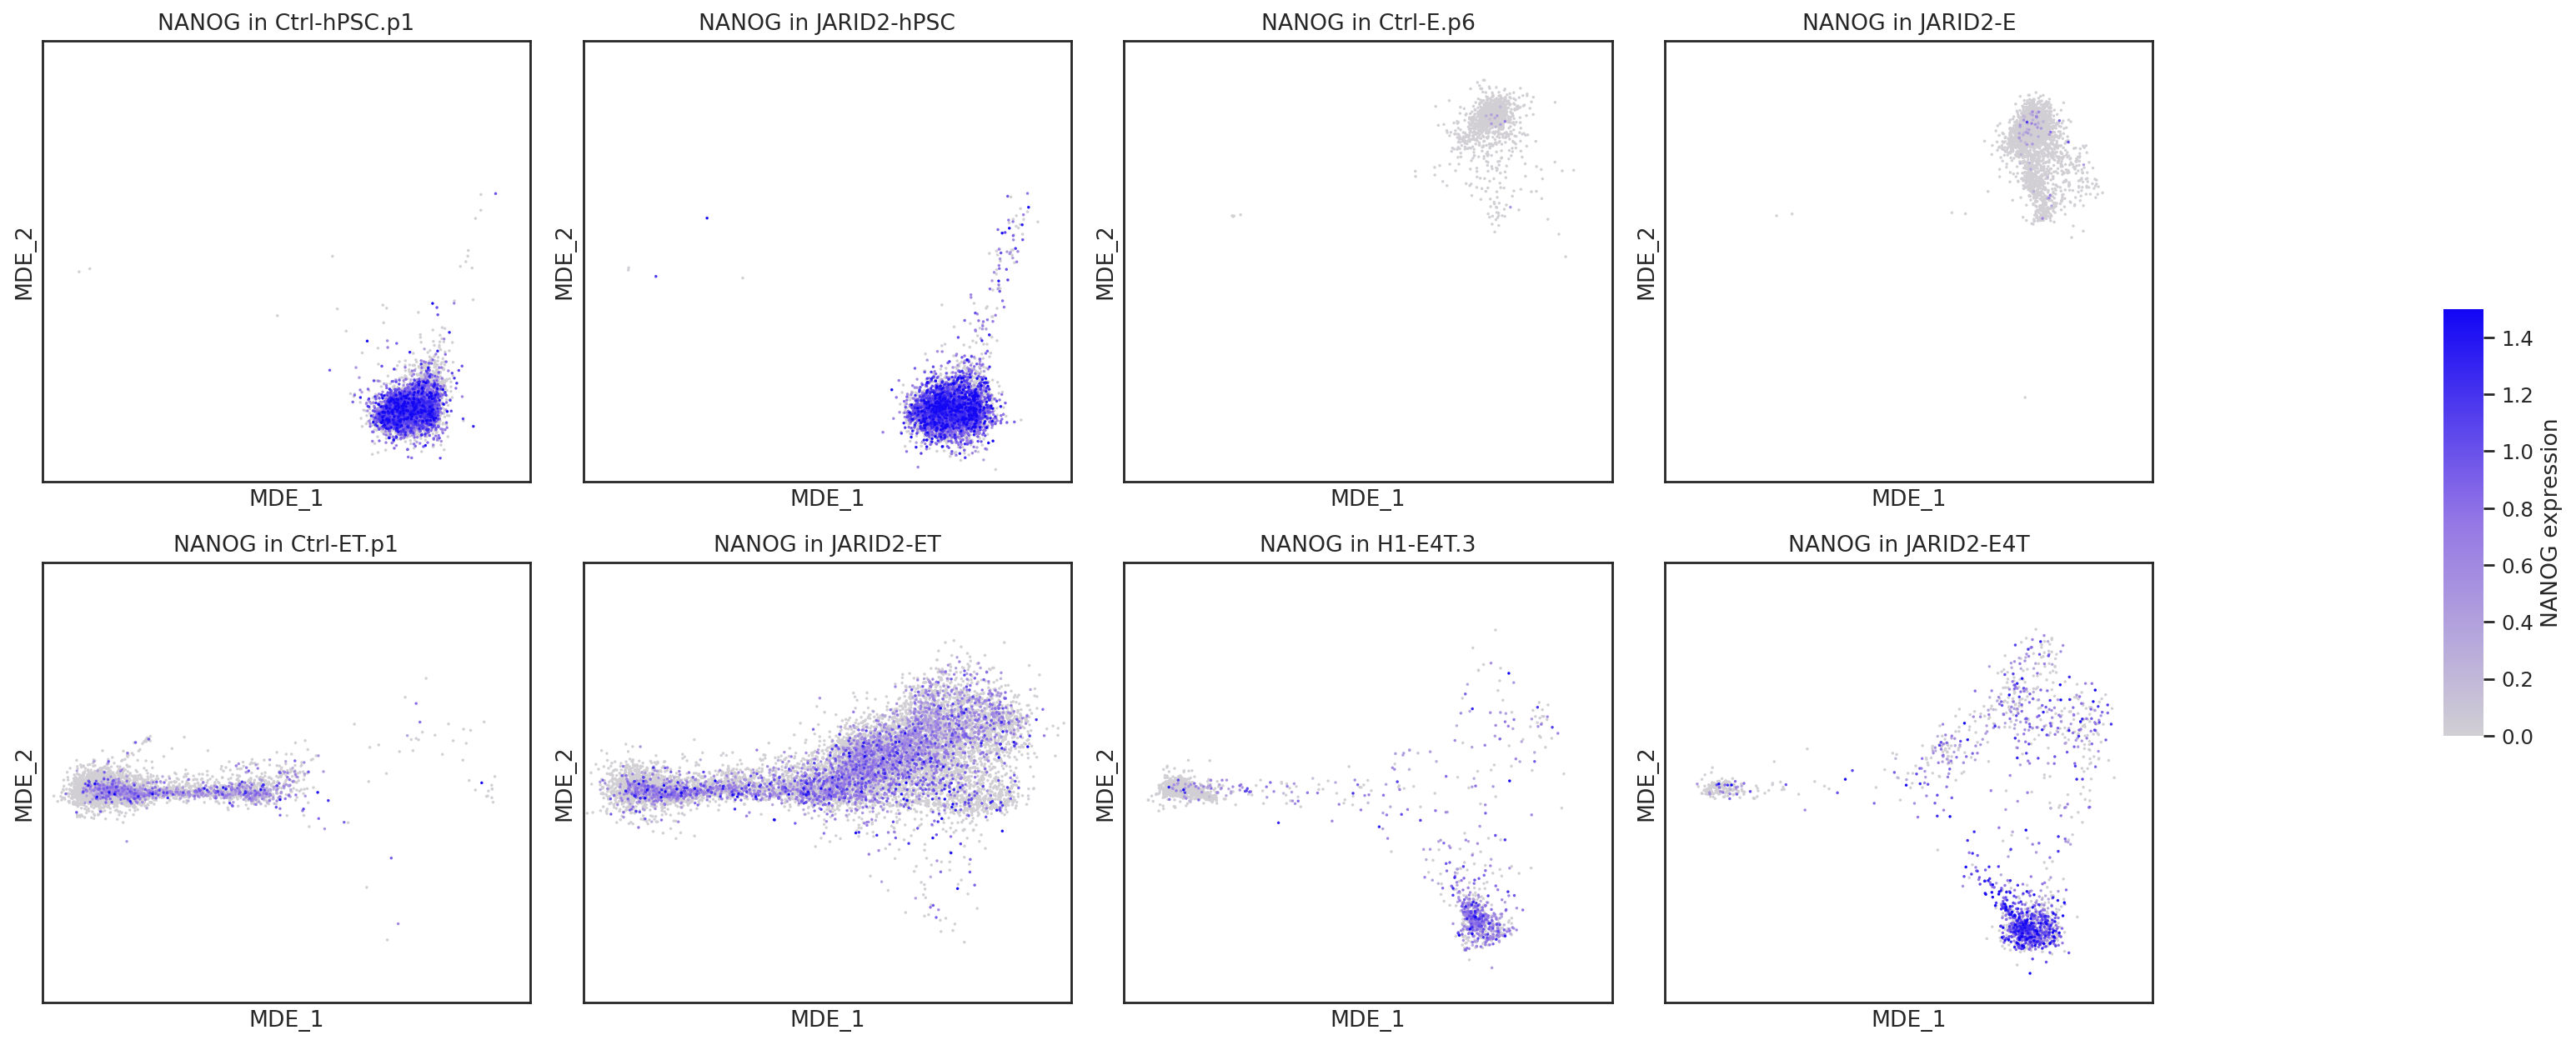

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.colors as mcolors

# 设置参数
gene = 'NANOG'
sample_list = ['Ctrl-hPSC.p1', 'JARID2-hPSC', 'Ctrl-E.p6', 'JARID2-E', 'Ctrl-ET.p1','JARID2-ET', 'H1-E4T.3', 'JARID2-E4T']
ncols = 4
nrows = (len(sample_list) + ncols - 1) // ncols

# 颜色参数
vmin, vmax = 0, 1.5
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 4*nrows))
axes = axes.flatten()

sns.set_theme(style="white")

for i, sample_name in enumerate(sample_list):
    adata_sub = adata2[adata2.obs['sample'] == sample_name].copy()
    data1 = pd.DataFrame(adata_sub.obsm['X_mde'], columns=['MDE_1','MDE_2'])
    data1[gene] = adata_sub[:, gene].X.toarray().flatten()
    data1 = data1.sort_values(gene).copy()

    ax = axes[i]
    scatter = sns.scatterplot(
        data=data1,
        x='MDE_1', y='MDE_2',
        hue=gene,
        palette=mycmap,
        s=2, alpha=1.00,
        edgecolor=None,
        hue_norm=(vmin, vmax),
        legend=False,
        ax=ax
    )
    
    mappable = scatter.collections[0]
    mappable.set_cmap(mycmap)
    mappable.set_norm(norm)

    ax.set_title(f"{gene} in {sample_name}")
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_xlim([-1.8, 1.0]); ax.set_ylim([-1.3, 1.2])

# 单独添加一个 colorbar
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.3, 0.015, 0.4])  # [left, bottom, width, height]
cbar = fig.colorbar(mappable, cax=cbar_ax)
cbar.outline.set_visible(False)
cbar.set_label(f"{gene} expression")

# 删除多余子图
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 0.82, 1])
plt.savefig("Figure2.NANOG.MDEmap.pdf", dpi=300, bbox_inches='tight')
plt.show()


# Figure 2 (JARID2) visualization

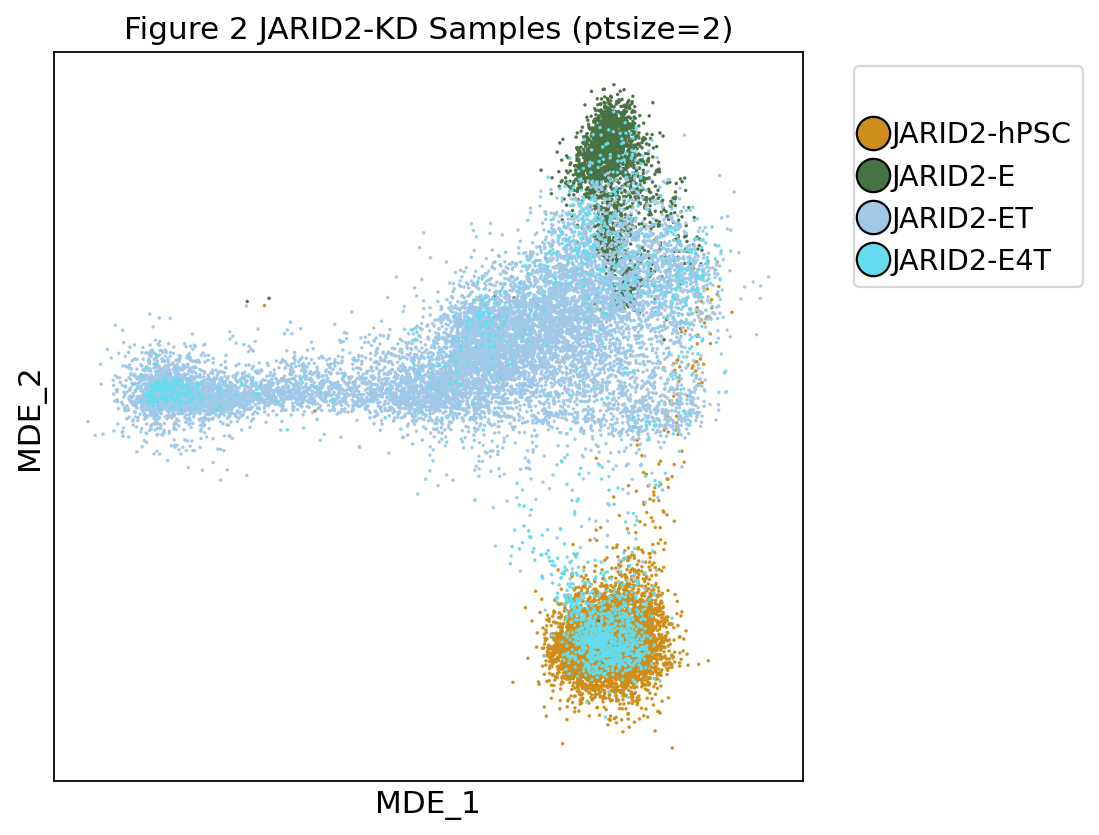

In [78]:
#sample_sel = adata_merged.obs['sample'].isin( ['Ctrl-hPSC.p1', 'Ctrl-E.p6', 'Ctrl-ET.p1', 'H1-E4T.3', 'JARID2-hPSC', 'JARID2-E', 'JARID2-ET', 'JARID2-E4T'] )
sample_sel = adata_merged.obs['sample'].isin( ['JARID2-hPSC', 'JARID2-E', 'JARID2-ET', 'JARID2-E4T'] )

adata2 = adata_merged[ sample_sel ].copy()


color_lut = { 
    'Ctrl-hPSC.p1' : '#f6c445',
    'JARID2-hPSC'  : '#CE8E1B',
 
    'Ctrl-E.p6' : '#72a699',
    'JARID2-E'  : '#477343' ,
    
    'Ctrl-ET.p1': "#3c69c3",
    'JARID2-ET' : '#a1c8e7',
    
    'H1-E4T.3'  : '#2e247e', 
    'JARID2-E4T': '#65dcee' 
}


import seaborn as sns, matplotlib.pyplot as plt

custom_palette = color_lut


data = pd.DataFrame(adata2.obsm['X_mde'], columns=['MDE_1','MDE_2'])


data['Sample'] = adata2.obs['sample'].astype(str).tolist()
custom_order = ['JARID2-hPSC', 'Ctrl-hPSC.p1', 'Ctrl-E.p6' ,'JARID2-E'  ,'Ctrl-ET.p1','JARID2-ET' ,  'H1-E4T.3'  ,'JARID2-E4T']
order_map = {key: i for i, key in enumerate(custom_order)}
data = data.sort_values(by='Sample', key=lambda x: x.map(order_map))


plt.figure(figsize=(6, 6))
scatter = sns.scatterplot(data=data, x='MDE_1', y='MDE_2', hue='Sample', s=2, alpha=1, edgecolor=None,
                #hue_order=['JARID2-hPSC','Ctrl-hPSC.p1' ,'Ctrl-E.p6' ,'JARID2-E'  ,'Ctrl-ET.p1','JARID2-ET' ,  'H1-E4T.3'  ,'JARID2-E4T'],
                palette=color_lut
               )


# 手动创建 legend 句柄，alpha=1
from matplotlib.lines import Line2D
order= [ 'JARID2-hPSC'  , 'JARID2-E'  ,'JARID2-ET' , 'JARID2-E4T']
new_handles = [Line2D([0], [0], marker='o', color='w',
                      markerfacecolor=custom_palette[label],
                      markeredgecolor='black',
                      markersize=15, alpha=1.0)
               for label in order]

plt.legend(handles=new_handles, labels=order,
           title=' ', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks([]);plt.yticks([]);plt.grid(False);
plt.title('Figure 2 JARID2-KD Samples (ptsize=2)')
plt.savefig("Figure2.Samples(JARID2-KD).MDEmap.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [79]:
sc.pp.neighbors(adata2, n_neighbors=30, use_rep='X_harmony')
sc.tl.leiden(adata2, resolution=0.3, key_added='hmy0.3', flavor='igraph', n_iterations=2)

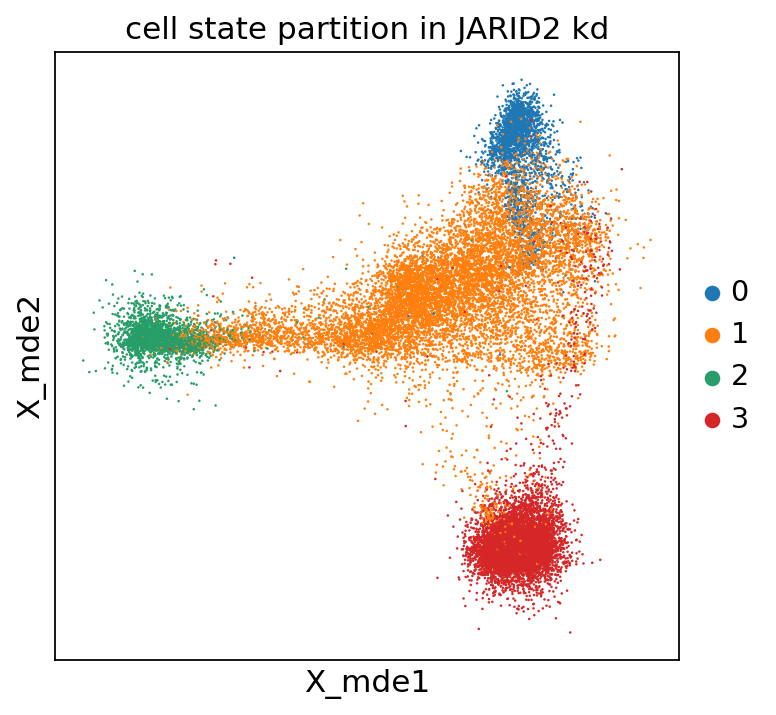

In [87]:
sc.set_figure_params(figsize=[5,5])
sc.pl.embedding(adata2, basis='X_mde', color='hmy0.3', title='cell state partition in JARID2 kd' )

In [85]:
import numpy as np
np.logical_and(
    adata2.obs['sample'] == 'JARID2-E4T',
    adata2.obs['hmy0.3'] == '3'
).sum() / \
(adata2.obs['sample'] == 'JARID2-E4T').sum()

np.float64(0.5151862464183381)

In [82]:
import numpy as np
np.logical_and(
    adata2.obs['sample'] == 'JARID2-E4T',
    adata2.obs['hmy0.3'] == '0'
).sum() / \
(adata2.obs['sample'] == 'JARID2-E4T').sum()

np.float64(0.03553008595988539)

In [83]:
import numpy as np
np.logical_and(
    adata2.obs['sample'] == 'JARID2-E4T',
    adata2.obs['hmy0.3'] == '1'
).sum() / \
(adata2.obs['sample'] == 'JARID2-E4T').sum()

np.float64(0.33810888252148996)

In [84]:
import numpy as np
np.logical_and(
    adata2.obs['sample'] == 'JARID2-E4T',
    adata2.obs['hmy0.3'] == '2'
).sum() / \
(adata2.obs['sample'] == 'JARID2-E4T').sum()

np.float64(0.11117478510028653)

# Figure2 (Ctrl) visualization

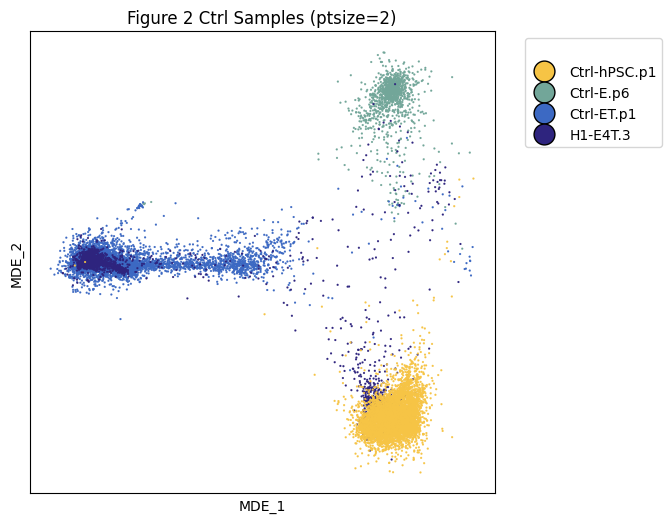

In [41]:
#sample_sel = adata_merged.obs['sample'].isin( ['Ctrl-hPSC.p1', 'Ctrl-E.p6', 'Ctrl-ET.p1', 'H1-E4T.3', 'JARID2-hPSC', 'JARID2-E', 'JARID2-ET', 'JARID2-E4T'] )
sample_sel = adata_merged.obs['sample'].isin( ['Ctrl-hPSC.p1', 'Ctrl-E.p6', 'Ctrl-ET.p1', 'H1-E4T.3'] )

adata2 = adata_merged[ sample_sel ].copy()


color_lut = { 
    'Ctrl-hPSC.p1' : '#f6c445',
    'JARID2-hPSC'  : '#CE8E1B',
 
    'Ctrl-E.p6' : '#72a699',
    'JARID2-E'  : '#477343' ,
    
    'Ctrl-ET.p1': "#3c69c3",
    'JARID2-ET' : '#a1c8e7',
    
    'H1-E4T.3'  : '#2e247e', 
    'JARID2-E4T': '#65dcee' 
}


import seaborn as sns, matplotlib.pyplot as plt

custom_palette = color_lut


data = pd.DataFrame(adata2.obsm['X_mde'], columns=['MDE_1','MDE_2'])


data['Sample'] = adata2.obs['sample'].astype(str).tolist()
data['Sample'] = pd.Categorical(data['Sample'], categories=['Ctrl-E.p6', 'Ctrl-ET.p1','H1-E4T.3','Ctrl-hPSC.p1'], ordered=True)
data = data.sort_values('Sample', ascending=True)

#custom_order = ['Ctrl-E.p6' , 'Ctrl-ET.p1', 'H1-E4T.3', 'Ctrl-hPSC.p1']
#order_map = {key: i for i, key in enumerate(custom_order)}
#data = data.sort_values(by='Sample', key=lambda x: x.map(order_map))
#data = data.sort_values('Sample', ascending=False)

plt.figure(figsize=(6, 6))
scatter = sns.scatterplot(data=data, x='MDE_1', y='MDE_2', hue='Sample', s=2, alpha=1, edgecolor=None,
                #hue_order=['JARID2-hPSC','Ctrl-hPSC.p1' ,'Ctrl-E.p6' ,'JARID2-E'  ,'Ctrl-ET.p1','JARID2-ET' ,  'H1-E4T.3'  ,'JARID2-E4T'],
                palette=color_lut
               )


# 手动创建 legend 句柄，alpha=1
from matplotlib.lines import Line2D
order= [ 'Ctrl-hPSC.p1', 'Ctrl-E.p6', 'Ctrl-ET.p1', 'H1-E4T.3']
new_handles = [Line2D([0], [0], marker='o', color='w',
                      markerfacecolor=custom_palette[label],
                      markeredgecolor='black',
                      markersize=15, alpha=1.0)
               for label in order]

plt.legend(handles=new_handles, labels=order,
           title=' ', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks([]);plt.yticks([]);plt.grid(False);
plt.title('Figure 2 Ctrl Samples (ptsize=2)')
plt.savefig("Figure2.Samples(Ctrl).MDEmap.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [54]:
sc.pp.neighbors(adata2, n_neighbors=30, use_rep='X_harmony')
sc.tl.leiden(adata2, resolution=0.3, key_added='hmy0.3', flavor='igraph', n_iterations=2)

2025-05-19 16:54:55.559669: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-19 16:54:56.436246: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747698896.684381   27247 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747698896.773965   27247 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747698897.274857   27247 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

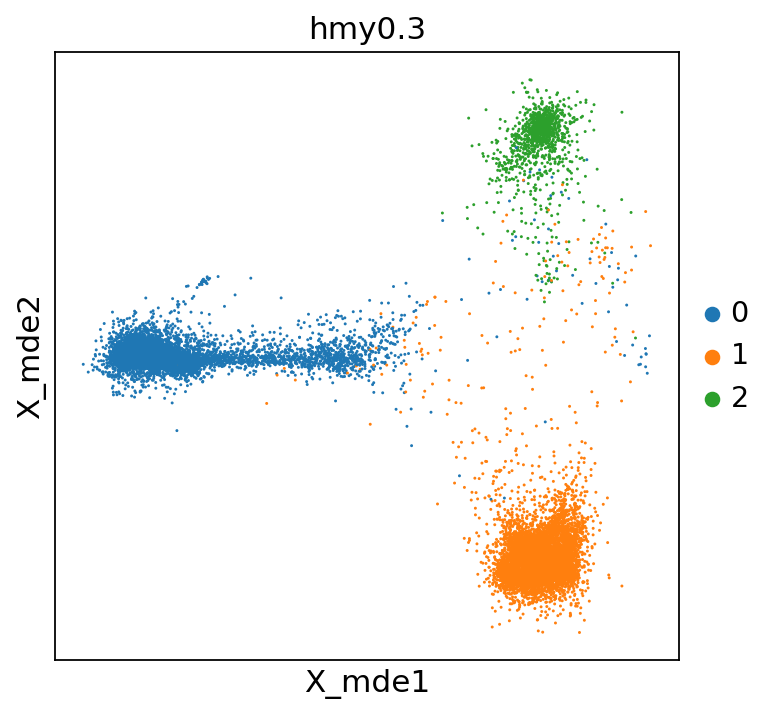

In [57]:
sc.set_figure_params(figsize=[5,5])
sc.pl.embedding(adata2, basis='X_mde', color='hmy0.3', save='')

In [76]:
import numpy as np
np.logical_and(
    adata2.obs['sample'] == 'H1-E4T.3',
    adata2.obs['hmy0.3'] == '0'
).sum() / \
(adata2.obs['sample'] == 'H1-E4T.3').sum()

np.float64(0.6544021024967148)

In [77]:
import numpy as np
np.logical_and(
    adata2.obs['sample'] == 'H1-E4T.3',
    adata2.obs['hmy0.3'] == '1'
).sum() / \
(adata2.obs['sample'] == 'H1-E4T.3').sum()

np.float64(0.3451598773543583)